In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import dataframe_image as dfi

%matplotlib inline

# %matplotlib inline #skip plt.show, show the image directly


df = pd.read_csv("indian_liver_patient.csv")
df.keys()

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

### (1) Visualizing the features of each category of people (healthy/unhealthy)

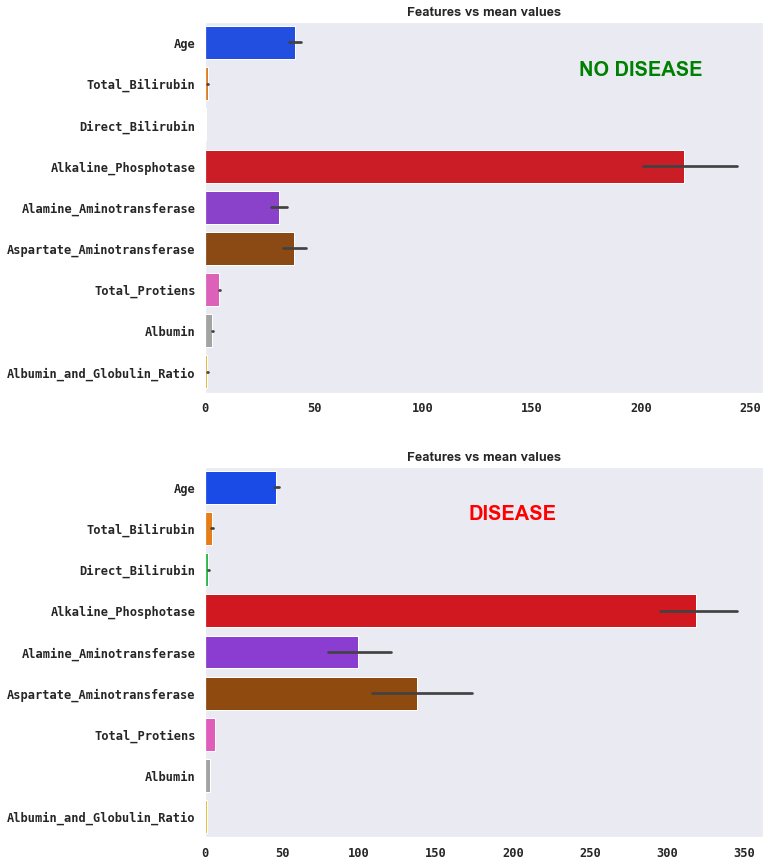

In [47]:
# no disease (original dataset had it labelled as 2 and not 0)
data1 = df[df['Dataset']==2] 
data1 = data1.iloc[:,:-1]

# with disease
data2 = df[df['Dataset']==1] 
data2 = data2.iloc[:,:-1]


fig = plt.figure(figsize=(10,15))

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.grid()
ax2.grid()

ax1.set_title('Features vs mean values',fontsize=13,weight='bold')
ax1.text(200,0.8,'NO DISEASE',fontsize=20,horizontalalignment='center',color='green',weight='bold')


ax2.set_title('Features vs mean values',fontsize=13,weight='bold')
ax2.text(200,0.8,'DISEASE',fontsize=20,horizontalalignment='center',color='red',weight='bold')

# for axis ax1
plt.sca(ax1)
plt.xticks(rotation = 0, 
           weight='bold', 
           family='monospace',
           size='large')
plt.yticks( weight='bold', 
           family='monospace',
           size='large')

# for axis ax2
plt.sca(ax2)
plt.xticks(rotation = 0, 
           weight='bold', 
           family='monospace',
           size='large')
plt.yticks( weight='bold', 
           family='monospace',
           size='large')

# sns.set_style('whitegrid')

sns.barplot(data=data1,ax=ax1,orient='horizontal', palette='bright') # no disease
sns.barplot(data=data2,ax=ax2,orient='horizontal',palette='bright',saturation=0.80) # with disease

### (2) Visualizing the differences in chemicals in Healthy/Unhealthy people

,Chemicals,Mean_Values,Status
0,Total_Bilirubin,4.164423,Diseased
1,Direct_Bilirubin,1.923558,Diseased
2,Alkaline_Phosphotase,319.007212,Diseased
3,Alamine_Aminotransferase,99.605769,Diseased
4,Aspartate_Aminotransferase,137.699519,Diseased
5,Total_Protiens,6.459135,Diseased
6,Albumin,3.060577,Diseased
7,Albumin_and_Globulin_Ratio,0.914179,Diseased
8,Total_Bilirubin,1.142515,Healthy
9,Direct_Bilirubin,0.396407,Healthy


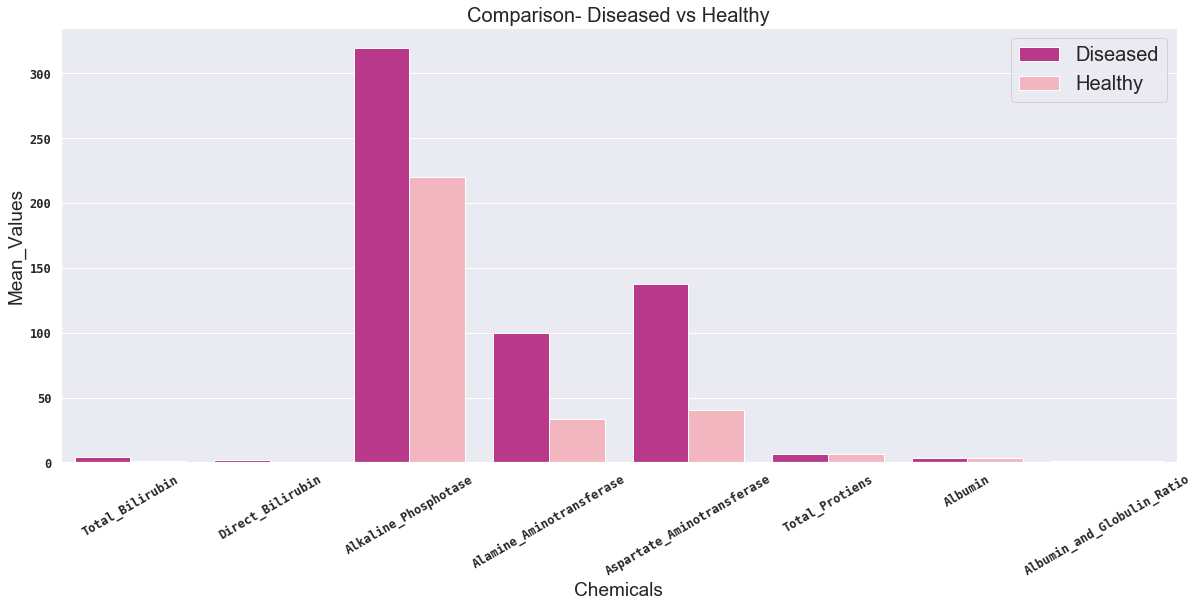

In [48]:
# with disease
with_disease = df[df['Dataset']==1]
with_disease = with_disease.drop(columns=['Gender','Age','Dataset'])
names1 = with_disease.columns.unique()
mean_of_features1 = with_disease.mean(axis=0,skipna=True)


without_disease = df[df['Dataset']==2]
without_disease = without_disease.drop(columns=['Gender','Age','Dataset'])
names2 = without_disease.columns.unique()
mean_of_features2 = without_disease.mean(axis=0,skipna=True)

people = []

for x,y in zip(names1,mean_of_features1):
    people.append([x,y,'Diseased'])
for x,y in zip(names2,mean_of_features2):
    people.append([x,y,'Healthy'])
    
new_data = pd.DataFrame(people,columns=['Chemicals','Mean_Values','Status'])

#ValueError: If using all scalar values, you must pass an index
#https://stackoverflow.com/questions/17839973/construct-pandas-dataframe-from-values-in-variables

fig = plt.figure(figsize=(20,8))
plt.title('Comparison- Diseased vs Healthy',size=20,loc='center')
plt.xticks(rotation = 30, 
           weight='bold', 
           family='monospace',
           size='large')
plt.yticks( weight='bold', 
           family='monospace',
           size='large')

g1 = sns.barplot(x='Chemicals',y='Mean_Values',hue='Status',data=new_data,palette="RdPu_r")
plt.legend(prop={'size': 20})
plt.xlabel('Chemicals',size=19)
plt.ylabel('Mean_Values',size=19)

new_data

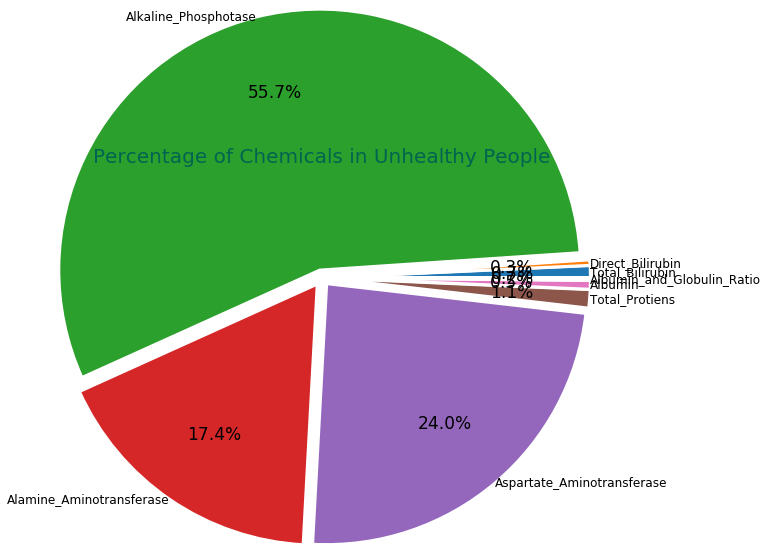

In [31]:
mydict = dict(mean_of_features1)

fig = plt.figure()
plt.title('Percentage of Chemicals in Unhealthy People',size=20,color='#016450')

# Create a pieplot
plt.axis('equal')
explode = (0.09,)*(len(mydict.values()))
color_pink=['#7a0177','#ae017e','#dd3497','#f768a1','#fa9fb5','#fcc5c0','#fde0dd','#fff7f3']

wedges, texts, autotexts = plt.pie( mydict.values(),
                                    explode=explode,
                                    labels=mydict.keys(), 
                                    labeldistance=1,
                                    textprops=dict(color='k'),
                                    radius=3,
                                    autopct="%1.1f%%",
                                    pctdistance=0.7,
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })

plt.setp(autotexts,size=17)
plt.setp(texts,size=12)
plt.show()

[None, None, None, None]

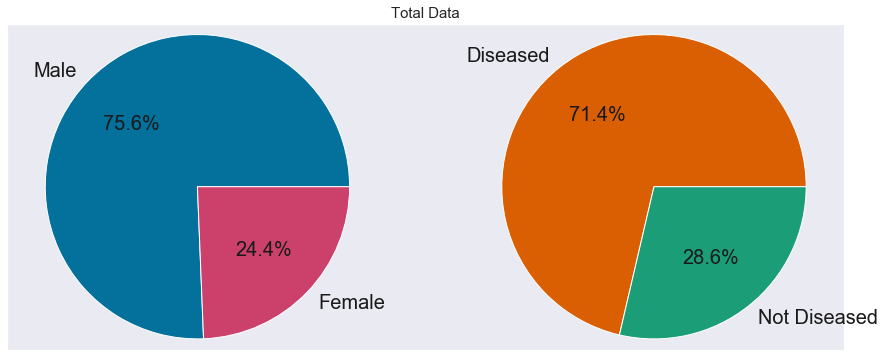

In [49]:
fig= plt.figure(figsize=(15,6),frameon=False) # I don't know why figure boundary is still visible
plt.title("Total Data",loc='center',weight=10,size=15)
plt.xticks([]) # to disable xticks
plt.yticks([]) # to disable yticks
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

only_gender = df['Gender']

male_tot = only_gender[only_gender=='Male']

num_of_male = len(male_tot)
num_of_female = len(df) - len(male_tot)

m_vs_f = [num_of_male,num_of_female]


with_disease = df[df['Dataset']==1]
not_with_disease = df[df['Dataset']==2]

with_disease = with_disease['Gender']

num_of_diseased = len(with_disease)
num_of_not_diseased = len(df) - len(with_disease)

d_vs_healthy = [num_of_diseased,num_of_not_diseased]


'''
By default, plots have more pixels along one axis over the other.
When you add a circle, it's traditionally added in data units. 
If your axes have a symmetric range, that means one step along the x axis 
will involve a different number of pixels than one step along your y axis. 
So a symmetric circle in data units is asymmetric in your Pixel units (what you actually see).
'''

# you can force the x and y axes to have equal number of pixels per data unit. 
# This is done using the plt.axis("equal") or ax.axis("equal") methods 
# (where ax is an instance of an Axes). 

ax1.axis('equal')
ax2.axis('equal')

# pie plot
wedges, texts, autotexts= ax1.pie(m_vs_f, 
                                  labels=('Male','Female'),
                                  radius=1,
                                  textprops=dict(color='k'),
                                  colors=['xkcd:ocean blue','xkcd:dark pink'],
                                  autopct="%1.1f%%")

# pie plot
wedges2, texts2, autotexts2 = ax2.pie(d_vs_healthy, 
                                  labels=('Diseased','Not Diseased'),
                                  radius=1,
                                  textprops=dict(color='k'),
                                  colors=['#d95f02','#1b9e77'],
                                  autopct="%1.1f%%")


plt.setp(autotexts,size=20)
plt.setp(texts,size=20)


plt.setp(autotexts2,size=20)
plt.setp(texts2,size=20)




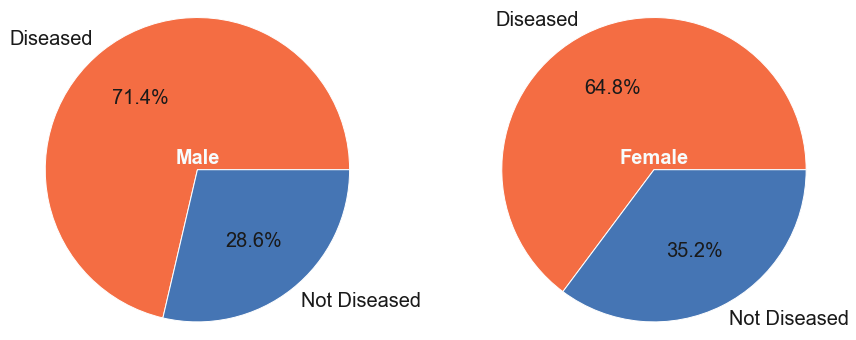

In [52]:
fig= plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

with_disease = df[df['Dataset']==1]
not_with_disease = df[df['Dataset']==2]

with_disease_m = with_disease[with_disease['Gender']=='Male']
with_disease_m = with_disease['Gender']
not_with_disease_m = not_with_disease[not_with_disease['Gender']=='Male']
not_with_disease_m = not_with_disease['Gender']

with_disease_f = with_disease[with_disease['Gender']=='Female']
not_with_disease_f = not_with_disease[not_with_disease['Gender']=='Female']

no_of_diseased_m = len(with_disease_m)
no_of_not_diseased_m = len(not_with_disease_m)

no_of_diseased_f = len(with_disease_f)
no_of_not_diseased_f = len(not_with_disease_f)

d_vs_healthy_m = [no_of_diseased_m, no_of_not_diseased_m]
d_vs_healthy_f = [no_of_diseased_f, no_of_not_diseased_f]

ax1.axis('equal')
ax2.axis('equal')
# pie plot

wedges, texts, autotexts = ax1.pie(d_vs_healthy_m, 
                                  labels=('Diseased','Not Diseased'),
                                  radius=1,
                                  textprops=dict(color='k'),
                                  colors=['#f46d43','#4575b4'],
                                  autopct="%1.1f%%")

wedges2, texts2, autotexts2 = ax2.pie(d_vs_healthy_f, 
                                  labels=('Diseased','Not Diseased'),
                                  radius=1,
                                  textprops=dict(color='k'),
                                  colors=['#f46d43','#4575b4'],
                                  autopct="%1.1f%%")

plt.setp(autotexts,size=20)
plt.setp(texts,size=20)

plt.setp(autotexts2,size=20)
plt.setp(texts2,size=20)

ax1.text(0,0.04,'Male',size=20,color='#f7fcfd',horizontalalignment='center',weight='bold')
ax2.text(0,0.04,'Female',size=20,color='#f7fcfd',horizontalalignment='center',weight='bold')



### Bar plots for categorical Features


Number of patients that are male:  441
Number of patients that are female:  142


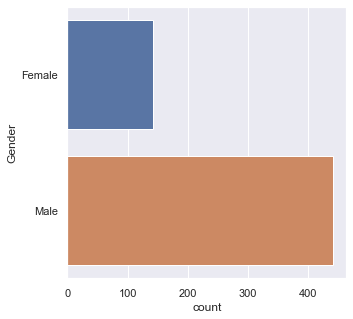

In [53]:
plt.figure(figsize=(5,5))
sns.countplot(y='Gender', data=df)

M, F = df['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

## There are more male patients than female patients
dfi.export(df.describe(), 'gender_ratio.png')

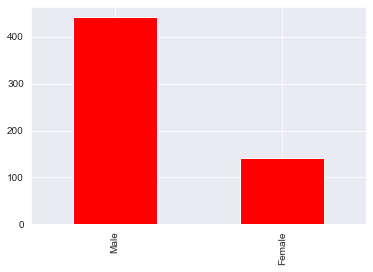

In [43]:
df["Gender"].value_counts().plot.bar(color='red')

### Age Analysis

C:\Users\home\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


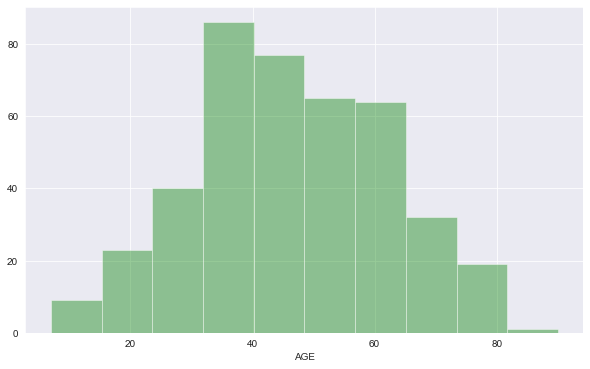

In [36]:
liver_diseased = df[df["Dataset"]==1]
sns.set_style('darkgrid')
fig = plt.figure(figsize=(10,6))
sns.distplot(liver_diseased['Age'],bins=10,kde=False,axlabel='AGE',color='green')

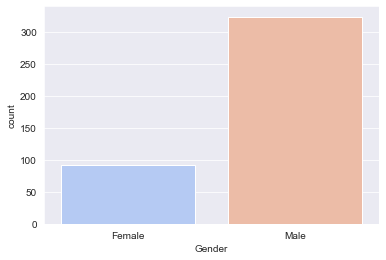

In [37]:
sns.countplot(x='Gender',data=liver_diseased,palette='coolwarm')


### Exploring the data visually
### Trying to find any correlations between the features.
### Here using pairplot in seaborn

In [38]:
df.dtypes[df.dtypes=='object']


Gender    object
dtype: object

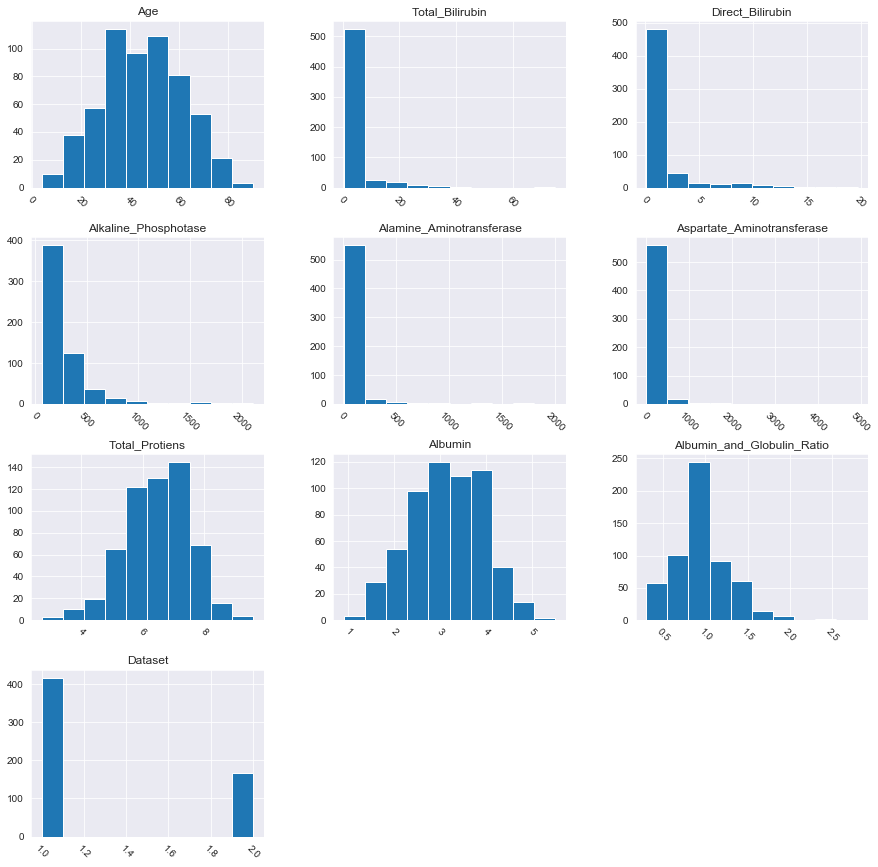

In [39]:
# Plot histogram grid
df.hist(figsize=(15,15), xrot=-45, bins=10) 
## Display the labels rotated by 45 degress

# Clear the text "residue"
plt.show()

In [57]:
# A more robust way of figuring out correlations other than observations as above is to generate a full correlation
# table with the ranging from -1 to 1
w=df.corr().style.background_gradient(cmap='coolwarm')
dfi.export(w, 'cor.png')

C:\Users\home\anaconda3\lib\site-packages\dataframe_image\_pandas_accessor.py:69: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = '<div>' + obj.render() + '</div>'


#### Based on the correlative pair plots, we find some interesting results directly.

-Positive correlations:

Total Bilirubin and Direct Bilirubin (vice-versa)

Alamine Aminotransferase and Aspartate Aminotransferase (vice-versa)

Total Protein and Albumin (vice-versa)

Albumin and Globulin Ratio and Albumin (vice-versa)

Total Protein and Albumin and Globulin Ration (vice-versa)

-Negative correlations:

Total Protein and age (vice-versa)

Albumin and age (vice-versa)

Albumin and Globulin Ration and age (vice-versa)

In [ ]:
d={'Model':['SVM','Logistic Regression', 'Gaussian Naive Bayes','Random Forest Classifier','Decision Tree Classifier','KNN', 'GBM', 'XGBoost', 'AdaBoost', 'Neural Networks'],
   'Accuracy_Score':[svm_acc*100,lg_acc*100, gauss_acc*100,rfc_acc*100,dtree_acc*100,knn_acc*100, gbm_acc*100, xgb_acc*100, adb_acc*100, neural_acc*100],
   'Precision_Score':[svm_prec*100,lg_prec*100, gauss_prec*100,rfc_prec*100,dtree_prec*100,knn_prec*100, gbm_prec*100, xgb_prec*100, adb_prec*100, neural_prec*100],
   'Recall_Score':[svm_rec*100,lg_rec*100, gauss_rec*100,rfc_rec*100,dtree_rec*100,knn_rec*100, gbm_rec*100, xgb_rec*100, adb_rec*100, neural_rec*100],
   'F1_Score':[svm_f1*100,lg_f1*100, gauss_f1*100, rfc_f1*100,dtree_f1*100,knn_f1*100, gbm_f1*100, xgb_f1*100, adb_f1*100, neural_f1*100],
   'Mean_Absolute_Error':[svm_mas*100,lg_mas*100, gauss_mas*100,rfc_mas*100,dtree_mas*100,knn_mas*100, gbm_mas*100, xgb_mas*100, adb_mas*100, neural_mas*100],
   'Root_Mean_Square_Error':[svm_rms*100,lg_rms*100, gauss_rms*100,rfc_rms*100,dtree_rms*100,knn_rms*100, gbm_rms*100, xgb_rms*100, adb_rms*100, neural_rms*100]}
results=pd.DataFrame(d)
results